dataset link - https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
advertising = pd.DataFrame(pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\advertising_extended_data.csv"))
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
advertising.shape

(700, 4)

In [30]:
advertising.describe()

,TV,radio,newspaper,sales
count,700.000000,700.000000,700.000000,700.000000
mean,148.068610,24.154476,38.544478,28.310727
std,88.464002,14.867007,26.963065,19.612894
min,0.676475,0.000000,0.108665,1.600000
25%,69.200000,10.817975,16.144454,12.200000
50%,151.826991,23.950000,33.958211,20.200000
75%,222.890990,36.800000,57.600000,43.184498
max,298.732775,49.787149,114.000000,86.695341


In [31]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         700 non-null    float64
 1   radio      700 non-null    float64
 2   newspaper  700 non-null    float64
 3   sales      700 non-null    float64
dtypes: float64(4)
memory usage: 22.0 KB


rEMOVING DUPLICATE VALUES

In [32]:
advertising.duplicated().sum()
advertising = advertising.drop_duplicates()

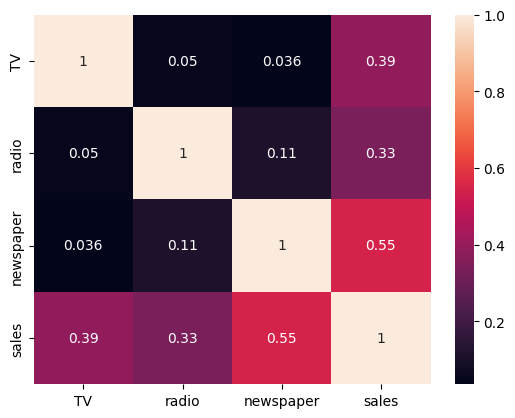

In [33]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

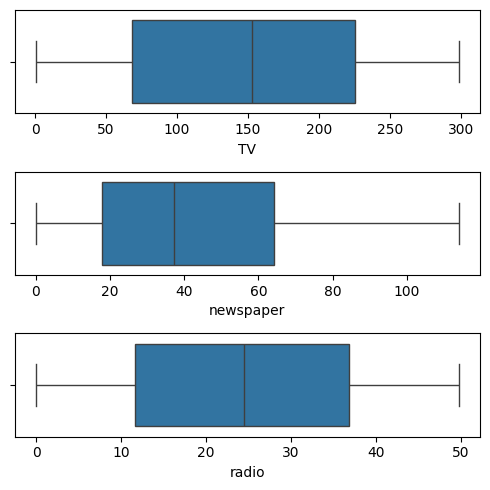

In [34]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1], orient='h')
plt3 = sns.boxplot(advertising['radio'], ax = axs[2], orient='h')
plt.tight_layout()

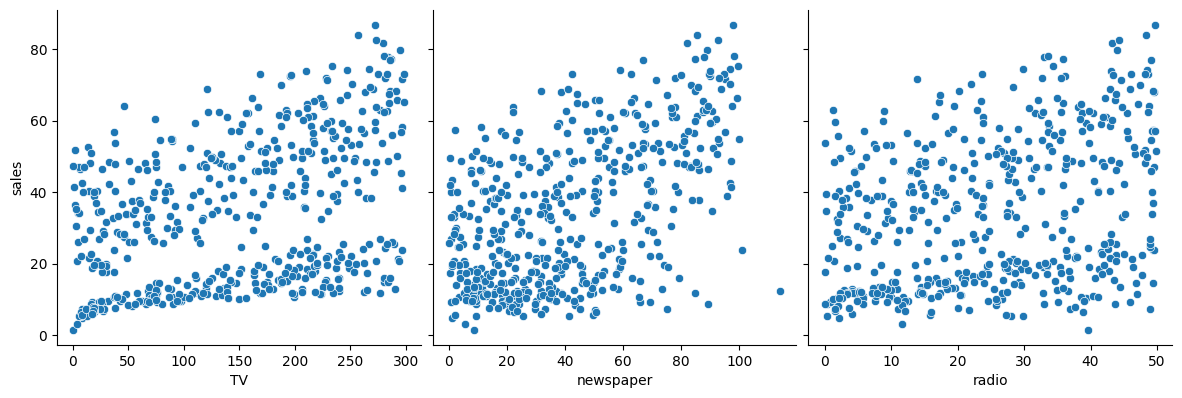

In [35]:
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

In [36]:
advertising

,TV,radio,newspaper,sales
0,230.100000,37.800000,69.200000,22.100000
1,44.500000,39.300000,45.100000,10.400000
2,17.200000,45.900000,69.300000,9.300000
3,151.500000,41.300000,58.500000,18.500000
4,180.800000,10.800000,58.400000,12.900000
...,...,...,...,...
695,241.967121,7.684382,66.784386,52.252470
696,147.090917,28.708345,0.627981,32.919558
697,88.901480,21.005939,99.911653,54.743982
698,80.946809,15.602569,14.123574,25.905330


Checking the NULL VALUES

In [37]:
advertising.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

REMOVING OUTLIERS

In [38]:
Q1 = advertising.quantile(0.25)
Q3 = advertising.quantile(0.75)
IQR = Q3 - Q1
data = advertising[~((advertising < (Q1 - 1.5 * IQR)) | (advertising > (Q3 + 1.5 * IQR))).any(axis=1)]


In [39]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [40]:
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

Features Scaling 

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [42]:
# Spli
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

Ridge regression with cross validation

In [43]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

Lasso regression with Cross validation


In [44]:
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

Evaluate the model 

In [45]:

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)


lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_r2 = r2_score(y_test, lasso_preds)

print("Ridge RMSE:", ridge_rmse)
print("Ridge R^2:", ridge_r2)
print("Lasso RMSE:", lasso_rmse)
print("Lasso R^2:", lasso_r2)



Ridge RMSE: 14.2930834994173
Ridge R^2: 0.50152299719023
Lasso RMSE: 14.013956099822337
Lasso R^2: 0.5208022495145961


Actual vs Predicted

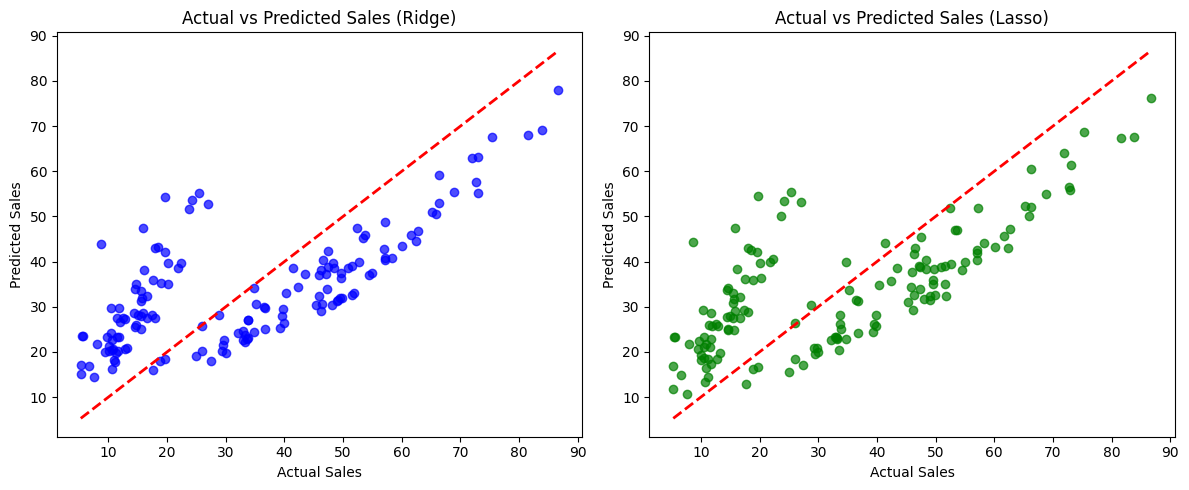

In [46]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_preds, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Ridge)')


plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_preds, alpha=0.7, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Lasso)')

plt.tight_layout()
plt.show()

In [47]:
import pickle
import os

# Define the path to save the model
directory = r'C:\\Users\\PC\\Desktop\\Python\\Python Notebooks'
if not os.path.exists(directory):
    os.makedirs(directory)
filename = os.path.join(directory, 'sales_prediction_lasso_model.pkl')

# Save the model to disk

with open(filename, 'wb') as file:
    pickle.dump(lasso, file)
print(f"Model saved to {filename}")

Model saved to C:\\Users\\PC\\Desktop\\Python\\Python Notebooks\sales_prediction_lasso_model.pkl
